# This is jupyter for demographics comparison between ABCD and SNUH dataset

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
#Please change path where demographic&factor score files are located
file_path = "/users/hjd/IG_my_study/SNUH/code/Github_upload/files/"

## Gather demographic information from both dataset

In [74]:
#Demographic data of ABCD subjects used in previous research
abcd_demo_path = file_path + "/SGNNTL_ABCD_demographics.npz"

#Demographic data of local (SNUH) data
snuh_demo_path = file_path + "/SGNNTL_SNUH_demographics.npz"

In [75]:
abcd_demo = np.load(abcd_demo_path,allow_pickle=True)
snuh_demo = np.load(snuh_demo_path,allow_pickle=True)

In [89]:
abcd_df = pd.DataFrame(index = abcd_demo['subjectkey'],columns=['age','sex','race','data'])
abcd_df['age'] = abcd_demo['age']
abcd_df['sex'] = abcd_demo['sex']
abcd_df['race'] = abcd_demo['race']
abcd_df['data'] = "ABCD"

In [93]:
snuh_df = pd.DataFrame(index = snuh_demo['subjectkey'],columns=['age','sex','race','data'])
snuh_df['age'] = snuh_demo['age']
snuh_df['sex'] = snuh_demo['sex']
#All SNUH subjects are Korean, but inlcuded in Asian for comparison with ABCD data
snuh_df['race'] = "Asian"
snuh_df['data'] = "SNUH"

In [95]:
total_df = pd.concat([abcd_df,snuh_df])

## Compare demographics

<AxesSubplot:xlabel='age', ylabel='Density'>

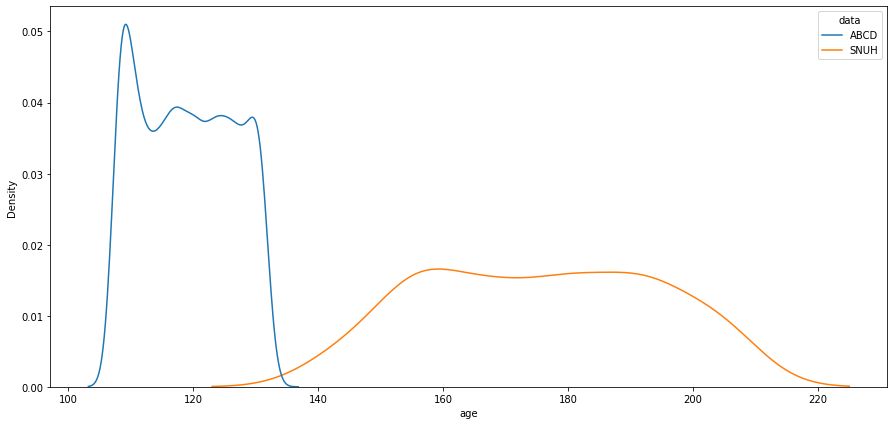

In [96]:
plt.figure(figsize=(15,7))
sns.kdeplot(x='age',data=total_df,common_norm=False,
            hue='data',
            hue_order = ["ABCD","SNUH"])

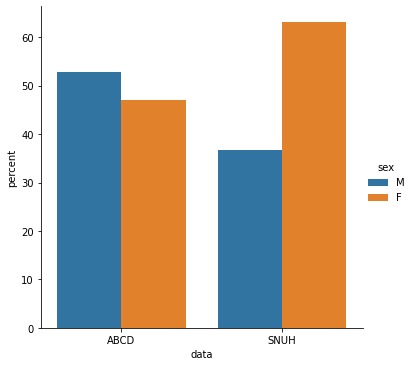

In [114]:
#Sex distribution of two datasets
total_df.groupby('data')['sex'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='data',y='percent',hue='sex',kind='bar')

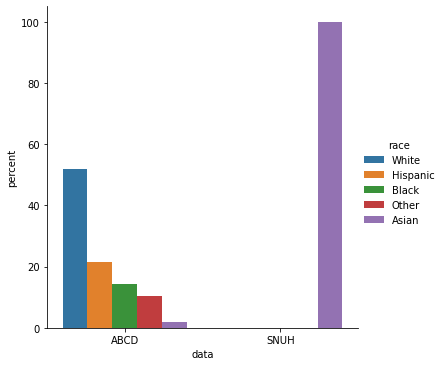

In [116]:
#Race(Ethnicity) distribution of two datasets
total_df.groupby('data')['race'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='data',y='percent',hue='race',kind='bar')

## Compare factor scores

In [118]:
abcd_fs_path = np.load(file_path+"/ABCD_CFA_5factor.npz",allow_pickle=True)
snuh_fs_path = np.load(file_path+"/SNUH_CFA_5factor.npz",allow_pickle=True)

In [129]:
abcd_fs_df = pd.DataFrame(index = abcd_demo['subjectkey'],columns=['P','EXT','INT','ND','SOM','DET'])
abcd_fs_df['P'] = abcd_fs_path['p']
abcd_fs_df['EXT'] = abcd_fs_path['ext']
abcd_fs_df['INT'] = abcd_fs_path['int']
abcd_fs_df['ND'] = abcd_fs_path['neu']
abcd_fs_df['SOM'] = abcd_fs_path['som']
abcd_fs_df['DET'] = abcd_fs_path['det']
abcd_fs_df['data'] = "ABCD"

In [130]:
snuh_fs_df = pd.DataFrame(index = snuh_demo['subjectkey'],columns=['P','EXT','INT','ND','SOM','DET'])
snuh_fs_df['P'] = snuh_fs_path['p']
snuh_fs_df['EXT'] = snuh_fs_path['ext']
snuh_fs_df['INT'] = snuh_fs_path['int']
snuh_fs_df['ND'] = snuh_fs_path['neu']
snuh_fs_df['SOM'] = snuh_fs_path['som']
snuh_fs_df['DET'] = snuh_fs_path['det']
snuh_fs_df['data'] = "SNUH"

In [131]:
total_fs_df = pd.concat([abcd_fs_df,snuh_fs_df])
total_fs_df_melt = total_fs_df.melt(id_vars='data')

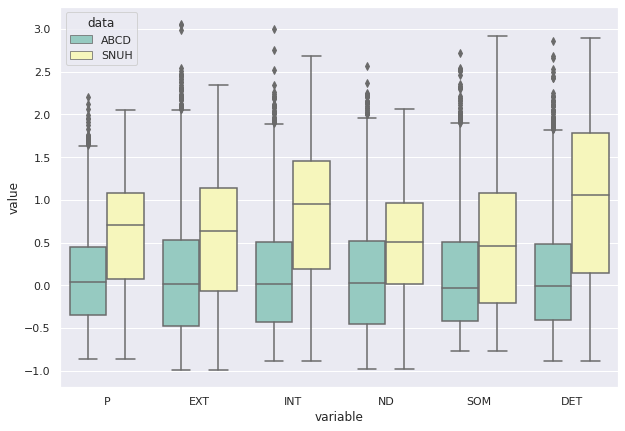

In [136]:
#ABCD <=> SNUH
sns.set(style='darkgrid',palette='Set3')
plt.figure(figsize=(10,7))
sns.boxplot(x='variable',y='value',data=total_fs_df_melt,hue='data')
plt.show()

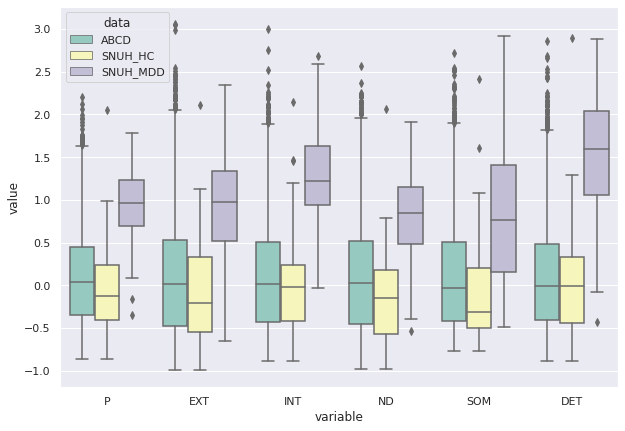

In [142]:
#ABCD <=> SNUH(MDD,HC separated)

for i in snuh_demo['subjectkey']:
    if 'C' in i:
        total_fs_df.loc[i,'data'] = 'SNUH_HC'
    elif 'P' in i:
        total_fs_df.loc[i,'data'] = 'SNUH_MDD'
    else:
        continue
total_fs_df_melt = total_fs_df.melt(id_vars='data')

sns.set(style='darkgrid',palette='Set3')
plt.figure(figsize=(10,7))
sns.boxplot(x='variable',y='value',data=total_fs_df_melt,hue='data')
plt.show()